In [2]:
from sryvl.envs.sryvl_v0.sryvl import SrYvlLvl0Env
from tqdm import tqdm
from exp.sryvl_study.attractor_player import AttractorPlayer, RandomPlayer
import numpy as np

In [3]:
n_sims = 1
env = SrYvlLvl0Env(
    # shrink_rate_min=0.001,
    # shrink_rate_max=0.0015,
)

In [6]:
agent_ = AttractorPlayer()
stats_att = []
for trial in tqdm(range(n_sims)):
    env.reset()
    # env.render('world_console')
    for i in range(50000):
        _, _, _, info = env.step(agent_(env.observe(), env.legal_actions))
        if i > 0:
            env.render('world_console')
        if env.done:
            break
    stats_att.append(env.stats_agg)

  0%|          | 0/1 [00:00<?, ?it/s]

1.1125703125
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □       ■ ■             ■         • ■     □ □ □
□ □ □       ■ ■           ■ ■ ■ •           • □ □ □
□ □ □ ■ ■ ■ ■ ■         ■ ■ ■ ■ ■         • • □ □ □
□ □ □ ■ ■ ■ ■ ■ ■       ■ ■ ■ ■ ■             □ □ □
□ □ □ ■ ■       ■ ■   •   ■ ■ ■ ■ •           □ □ □
□ □ □ ■                   ■ ■                 □ □ □
□ □ □ •                 • ■ ■           ■ ■ ■ □ □ □
□ □ □     •               ■ ■       ■ ■ ■ ■ ■ □ □ □
□ □ □ 🔺   ■ ■   •       ■ ■       ■ ■ ■ ■ ■ ■ □ □ □
□ □ □     ■ ■ ■       •       •   ■ ■ ■       □ □ □
□ □ □     ■ ■ ■                               □ □ □
□ □ □   ■ ■ ■ ■ ■ •           •           •   □ □ □
□ □ □ ■     ■ ■ ■     • ■                 •   □ □ □
□ □ □ ■     •             •                 ■ □ □ □
□ □ □                       • ■   •   ■ ■ ■ ■ □ □ □
□ □ □ ■ •             •             ■ ■ ■ ■   □ □ □

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

1.0370328343644215
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □ □
□ □ □       ■ ■             ■           ■ •   □ □ □
□ □ □       ■ ■           ■ ■ ■               □ □ □
□ □ □ ■ ■ ■ ■ ■         ■ ■ ■ ■ ■             □ □ □
□ □ □ ■ ■ ■ ■ ■ ■       ■ ■ ■ ■ ■     •       □ □ □
□ □ □ ■ ■       ■ ■       ■ ■ ■ ■   •         □ □ □
□ □ □ ■                   ■ ■                 □ □ □
□ □ □                     ■ ■           ■ ■ ■ □ □ □
□ □ □                     ■ ■       ■ ■ ■ ■ ■ □ □ □
□ □ □     ■ ■           ■ ■       ■ ■ ■ ■ ■ ■ □ □ □
□ □ □     ■ ■ ■                   ■ ■ ■       □ □ □
□ □ □     ■ ■ ■                               □ □ □
□ □ □   ■ ■ ■ ■ ■                             □ □ □
□ □ □ ■     ■ ■ ■       ■                     □ □ □
□ □ □ ■                                     ■ □ □ □
□ □ □                         ■       ■ ■ ■ ■ □ □ □
□ □ □ ■                             ■ ■ ■ ■  

In [8]:
i

482

In [4]:
agent = RandomPlayer()
stats_rand = []
for trial in tqdm(range(n_sims)):
    env.reset()
    for i in range(50000):
        env.step(agent(env.observe(), env.legal_actions))
        if env.done:
            break
    stats_rand.append(env.stats_agg)

100%|██████████| 10/10 [00:00<00:00, 16.12it/s]


In [5]:
steps_att = np.array([stats_att[i]['steps'] for i in range(n_sims)])
steps_rand = np.array([stats_rand[i]['steps'] for i in range(n_sims)])
steps_att.mean(), steps_rand.mean()

(193.2, 88.2)

In [6]:
stats_rand[0].keys()

dict_keys(['steps', 'food_eaten', 'n_foods_available', 'n_foods_expired', 'n_foods_generated', 'has_eaten', 'health'])

In [7]:
food_eaten_att = np.array([stats_att[i]['food_eaten'] for i in range(n_sims)])
food_eaten_rand = np.array([stats_rand[i]['food_eaten'] for i in range(n_sims)])
food_eaten_att.mean(), food_eaten_rand.mean()

(18.2, 2.5)

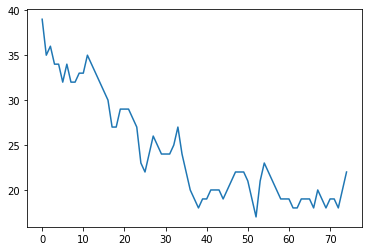

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.array(stats_rand[4]['n_foods_available']))

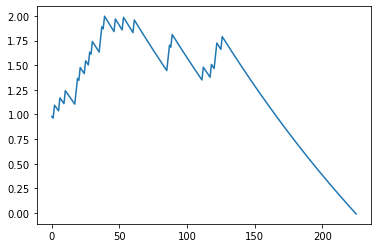

In [9]:
plt.plot(np.array(stats_att[1]['health']))